## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre ripple y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [1]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/ripple/coin_id_ripple.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_ripple1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_ripple1)

       id symbol name  block_time_in_minutes hashing_algorithm  \
0  ripple    xrp  XRP                      0              None   

                                         description  \
0  Ripple is the catchall name for the cryptocurr...   

                           homepage  reddit_subscribers  twitter_followers  \
0  https://ripple.com/currency/, ,                    0            2676747   

                                        github_repos              last_updated  
0  https://github.com/ripple/rippled, https://git...  2023-08-14T05:31:50.796Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [2]:
#Eliminar columnas
coin_id_ripple1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [3]:
print(coin_id_ripple1)

       id symbol name  block_time_in_minutes hashing_algorithm  \
0  ripple    xrp  XRP                      0              None   

   reddit_subscribers  twitter_followers  
0                   0            2676747  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

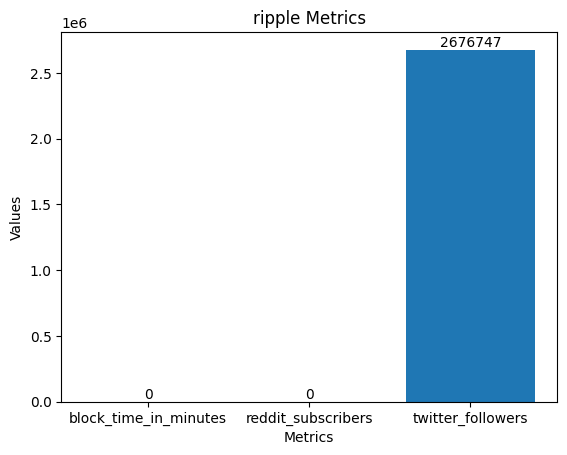

In [4]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_ripple1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_ripple1['reddit_subscribers'][0],
    'twitter_followers': coin_id_ripple1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('ripple Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [5]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ripple1.to_excel("..\Data\Datos_Procesados/ripple\coin_id_ripple1.xlsx", sheet_name="coin_id_ripple1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [6]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/ripple\coin_id_ripple.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_ripple2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_ripple2)

       id symbol name asset_platform_id platforms_  \
0  ripple    xrp  XRP              None              

  detail_platforms__decimal_place detail_platforms__contract_address  \
0                            None                                      

   block_time_in_minutes hashing_algorithm        categories  ...  \
0                      0              None  [Cryptocurrency]  ...   

  developer_data_pull_requests_merged  \
0                                 546   

  developer_data_pull_request_contributors  \
0                                       49   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                                 85          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                                 -6          

  developer_data_commit_count_4_weeks  \
0                                   3   

  developer_data_last_4_weeks_commit_activity_series  \
0  [0, 3, 3, 2, 4, 1, 2, 0, 1, 0, 2, 1

In [7]:
coin_id_ripple2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   detail_platforms__decimal_place                            0 non-null      object 
 6   detail_platforms__contract_address                         1 non-null      object 
 7   block_time_in_minutes                                      1 non-null      int64  
 8   hashing_algori

Valores faltantes

In [8]:
missing_values = coin_id_ripple2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 62, dtype: int64


Exportar dataframe a archivo .xlsx

In [9]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ripple2.to_excel("..\Data\Datos_Procesados/ripple\coin_id_ripple2.xlsx", sheet_name="coin_id_ripple2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [10]:
with open('..\Data\Fuente_json/ripple\coin_id_market_chart_ripple.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_ripple= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_ripple)


                     prices                          market_caps  \
0     [1375574400000, 0.01]            [1375574400000, 45921034]   
1     [1375660800000, 0.01]            [1375660800000, 44191247]   
2        [1375747200000, 0]            [1375747200000, 36500633]   
3        [1375833600000, 0]            [1375833600000, 35071445]   
4        [1375920000000, 0]            [1375920000000, 32800191]   
...                     ...                                  ...   
3654  [1691712000000, 0.63]  [1691712000000, 33426764509.192726]   
3655  [1691798400000, 0.63]   [1691798400000, 33340650585.52871]   
3656  [1691884800000, 0.63]   [1691884800000, 33093472877.81856]   
3657  [1691971200000, 0.63]   [1691971200000, 33020932779.51416]   
3658  [1691994004000, 0.63]  [1691994004000, 33200015730.047386]   

                            total_volumes  
0                      [1375574400000, 0]  
1                      [1375660800000, 0]  
2                      [1375747200000, 0]  
3      

tratamiento de columnas como listas

In [11]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_ripple['timestamp'] = coin_id_market_chart_ripple['prices'].apply(lambda x: x[0])
coin_id_market_chart_ripple['price'] = coin_id_market_chart_ripple['prices'].apply(lambda x: x[1])
coin_id_market_chart_ripple['market_cap'] = coin_id_market_chart_ripple['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_ripple['volume'] = coin_id_market_chart_ripple['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_ripple['timestamp'] = pd.to_datetime(coin_id_market_chart_ripple['timestamp'], unit='ms')
coin_id_market_chart_ripple['price'] = pd.to_numeric(coin_id_market_chart_ripple['price'])
coin_id_market_chart_ripple['market_cap'] = pd.to_numeric(coin_id_market_chart_ripple['market_cap'])
coin_id_market_chart_ripple['volume'] = pd.to_numeric(coin_id_market_chart_ripple['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_ripple.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_ripple)

               timestamp  price    market_cap        volume
0    2013-08-04 00:00:00   0.01  4.592103e+07  0.000000e+00
1    2013-08-05 00:00:00   0.01  4.419125e+07  0.000000e+00
2    2013-08-06 00:00:00   0.00  3.650063e+07  0.000000e+00
3    2013-08-07 00:00:00   0.00  3.507144e+07  0.000000e+00
4    2013-08-08 00:00:00   0.00  3.280019e+07  0.000000e+00
...                  ...    ...           ...           ...
3654 2023-08-11 00:00:00   0.63  3.342676e+10  1.063358e+09
3655 2023-08-12 00:00:00   0.63  3.334065e+10  9.249709e+08
3656 2023-08-13 00:00:00   0.63  3.309347e+10  5.029214e+08
3657 2023-08-14 00:00:00   0.63  3.302093e+10  6.209399e+08
3658 2023-08-14 06:20:04   0.63  3.320002e+10  8.161493e+08

[3659 rows x 4 columns]


transformacion de datos

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_ripple['timestamp'] = pd.to_datetime(coin_id_market_chart_ripple['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_ripple['timestamp'] = coin_id_market_chart_ripple['timestamp'].dt.date

In [13]:
coin_id_market_chart_ripple

,timestamp,price,market_cap,volume
0,2013-08-04,0.01,4.592103e+07,0.000000e+00
1,2013-08-05,0.01,4.419125e+07,0.000000e+00
2,2013-08-06,0.00,3.650063e+07,0.000000e+00
3,2013-08-07,0.00,3.507144e+07,0.000000e+00
4,2013-08-08,0.00,3.280019e+07,0.000000e+00
...,...,...,...,...
3654,2023-08-11,0.63,3.342676e+10,1.063358e+09
3655,2023-08-12,0.63,3.334065e+10,9.249709e+08
3656,2023-08-13,0.63,3.309347e+10,5.029214e+08
3657,2023-08-14,0.63,3.302093e+10,6.209399e+08


In [14]:
# cambiar nombre columna
coin_id_market_chart_ripple.rename(columns={'timestamp': 'date'}, inplace=True)

In [15]:
print(coin_id_market_chart_ripple)

            date  price    market_cap        volume
0     2013-08-04   0.01  4.592103e+07  0.000000e+00
1     2013-08-05   0.01  4.419125e+07  0.000000e+00
2     2013-08-06   0.00  3.650063e+07  0.000000e+00
3     2013-08-07   0.00  3.507144e+07  0.000000e+00
4     2013-08-08   0.00  3.280019e+07  0.000000e+00
...          ...    ...           ...           ...
3654  2023-08-11   0.63  3.342676e+10  1.063358e+09
3655  2023-08-12   0.63  3.334065e+10  9.249709e+08
3656  2023-08-13   0.63  3.309347e+10  5.029214e+08
3657  2023-08-14   0.63  3.302093e+10  6.209399e+08
3658  2023-08-14   0.63  3.320002e+10  8.161493e+08

[3659 rows x 4 columns]


In [16]:
coin_id_market_chart_ripple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3659 non-null   object 
 1   price       3659 non-null   float64
 2   market_cap  3659 non-null   float64
 3   volume      3659 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.5+ KB


## Grafico
para evidenciar outliers

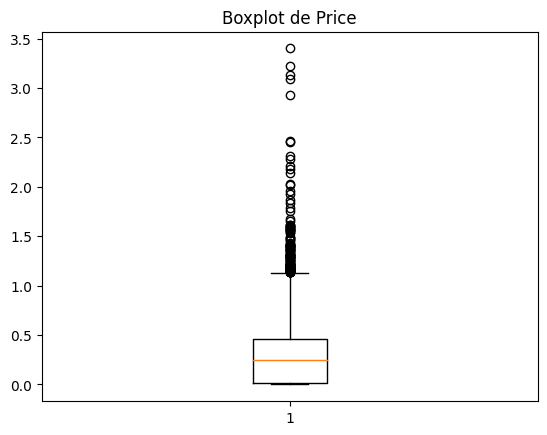

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_ripple['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

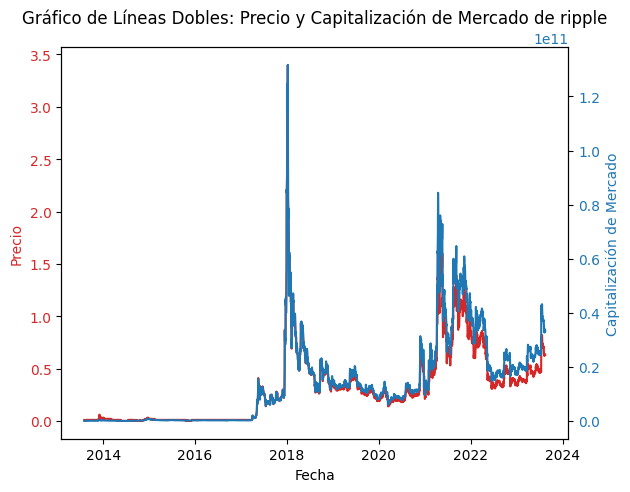

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ripple['date'] = pd.to_datetime(coin_id_market_chart_ripple['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_ripple['date'], coin_id_market_chart_ripple['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_ripple['date'], coin_id_market_chart_ripple['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de ripple')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_8536\2283730688.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


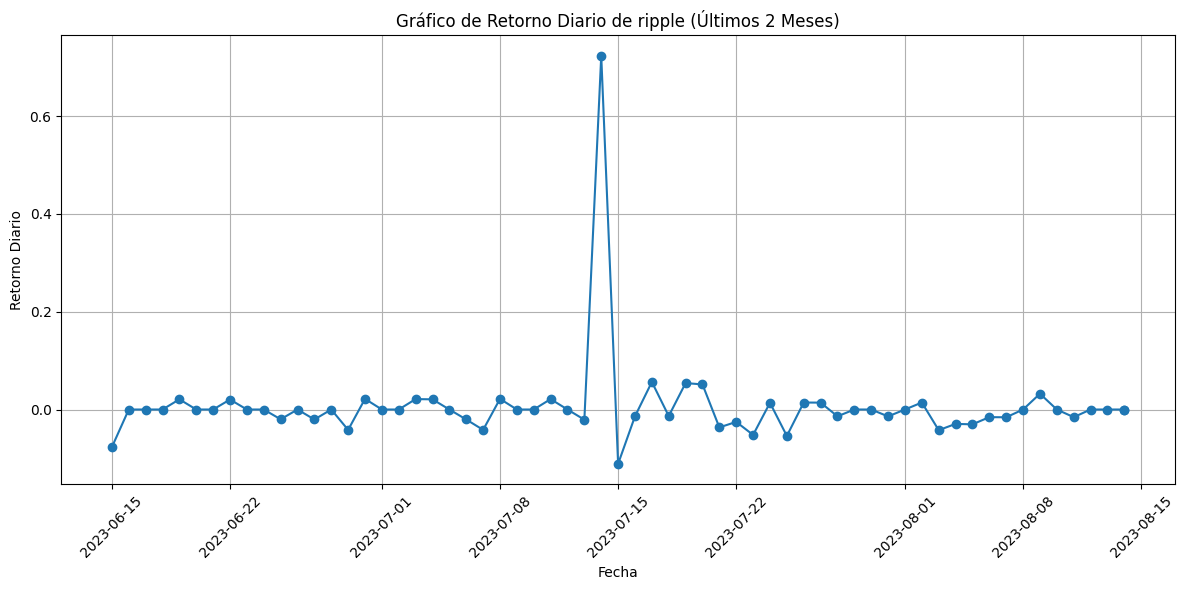

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ripple['date'] = pd.to_datetime(coin_id_market_chart_ripple['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_ripple[
    (coin_id_market_chart_ripple['date'] >= six_months_ago) &
    (coin_id_market_chart_ripple['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de ripple (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

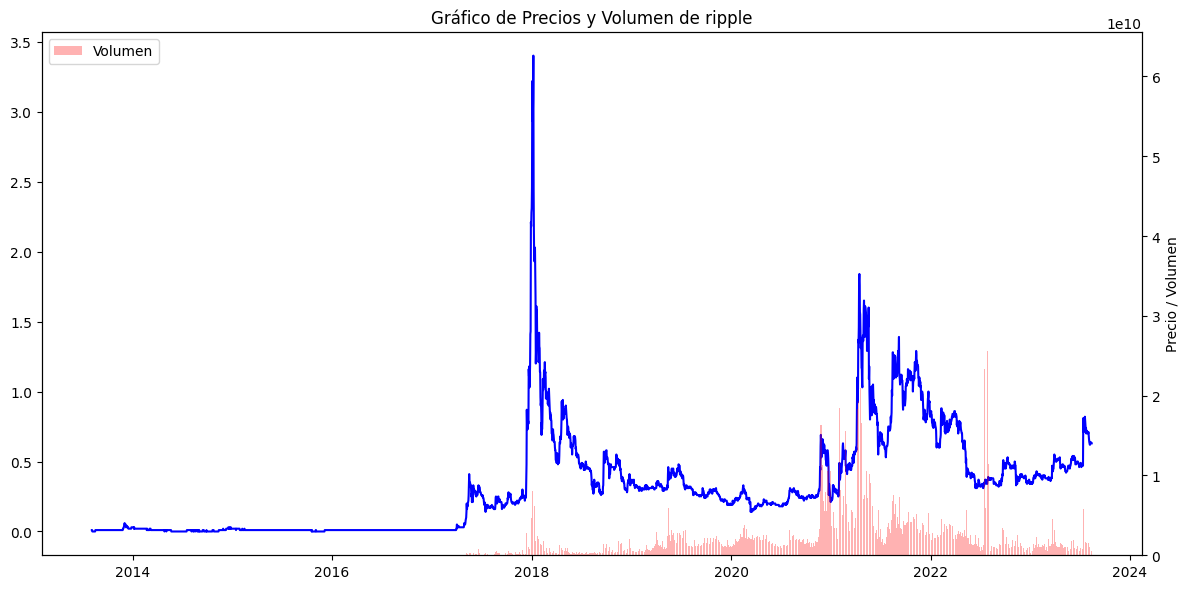

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_ripple['date'] = pd.to_datetime(coin_id_market_chart_ripple['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_ripple['date'], coin_id_market_chart_ripple['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_ripple['date'], coin_id_market_chart_ripple['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de ripple')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [21]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_ripple.to_excel("..\Data\Datos_Procesados/ripple\coin_id_market_chart_ripple.xlsx", sheet_name="coin_id_market_chart_ripple.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [22]:
with open('..\Data\Fuente_json/ripple\coin_id_ohlc_ripple.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_ripple= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_ripple)

                 0     1     2     3     4
0    1375833600000  0.01  0.01  0.00  0.00
1    1376179200000  0.00  0.00  0.00  0.00
2    1376524800000  0.00  0.00  0.00  0.00
3    1376870400000  0.00  0.01  0.00  0.01
4    1377216000000  0.01  0.01  0.01  0.01
..             ...   ...   ...   ...   ...
950  1690761600000  0.71  0.71  0.70  0.70
951  1691020800000  0.70  0.71  0.68  0.68
952  1691366400000  0.66  0.66  0.62  0.62
953  1691712000000  0.62  0.64  0.62  0.63
954  1692057600000  0.63  0.63  0.63  0.63

[955 rows x 5 columns]


In [23]:
coin_id_ohlc_ripple[0] = pd.to_datetime(coin_id_ohlc_ripple[0], unit='ms')

In [24]:
# cambiar nombre columna
coin_id_ohlc_ripple.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [25]:
coin_id_ohlc_ripple

,0,Open,High,Low,Close
0,2013-08-07,0.01,0.01,0.00,0.00
1,2013-08-11,0.00,0.00,0.00,0.00
2,2013-08-15,0.00,0.00,0.00,0.00
3,2013-08-19,0.00,0.01,0.00,0.01
4,2013-08-23,0.01,0.01,0.01,0.01
...,...,...,...,...,...
950,2023-07-31,0.71,0.71,0.70,0.70
951,2023-08-03,0.70,0.71,0.68,0.68
952,2023-08-07,0.66,0.66,0.62,0.62
953,2023-08-11,0.62,0.64,0.62,0.63


In [26]:
coin_id_ohlc_ripple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       955 non-null    datetime64[ns]
 1   Open    955 non-null    float64       
 2   High    955 non-null    float64       
 3   Low     955 non-null    float64       
 4   Close   955 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 37.4 KB


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_ripple.to_excel("..\Data\Datos_Procesados/ripple\coin_id_ohlc_ripple.xlsx", sheet_name="coin_id_ohlc_ripple.xlsx", index=False, float_format="%.2f")